In [1]:
#Install Packages
!pip install contextily
!pip install geoplot
!pip install git+https://github.com/pmdscully/geo_northarrow.git
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 125.9 MB/s eta 0:00:00
  Cloning https://github.com/pmdscully/geo_northarrow.git to /tmp/pip-req-build-pk6plveo
  Running command git clone --filter=blob:none --quiet https://github.com/pmdscully/geo_northarrow.git /tmp/pip-req-build-pk6plveo
  Resolved https://github.com/pmdscully/geo_northarrow.git to commit c530ad3f9558d05355543e9fe7671f26cd0ffa02
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for geo_northarrow: filename=geo_northarrow-0.2.0a0-py3-none-any.whl size=14940 sha256=096b768798e9ad6378c97da6899408aeef7bf750f7a43518176ac973469e771f
  Stored in directory: /tmp/pip-ephem-wheel-cache-vvq6ixra/wheels/d7/28/6c/cb006605c19bc4f58db715626f7113a6858d8c002e8c52fa80
Successfully built geo_northarrow


In [3]:
#Import the required packages

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import contextily as ctx
import seaborn as sns
from scipy import stats

from sklearn import cluster
from sklearn.preprocessing import scale

import geoplot as gplt
import geoplot.crs as gcrs
from geo_northarrow import add_north_arrow

sns.set_theme(style="white")

In [4]:
# Read the Greater Manchester boundaries that are stored on my GitHub repository
gm = gpd.read_file('https://raw.githubusercontent.com/nickmalleson/GEOG5415M/refs/heads/main/greater_manchester_lsoas.geojson')



In [5]:
gm

,FID,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,LAD23CD,geometry
0,4507,E01004766,Bolton 005A,,371186,411551,53.59974,-2.43687,e477863a-2196-4413-9fa6-a8f5a9fe2fe5,E08000001,"POLYGON ((-2.43176 53.6026, -2.43456 53.59621,..."
1,4508,E01004767,Bolton 005B,,371871,411508,53.59939,-2.42651,53b4276a-bc65-47d7-83ff-98c02c41623c,E08000001,"POLYGON ((-2.42169 53.6027, -2.41849 53.60097,..."
2,4509,E01004768,Bolton 001A,,370034,413227,53.61474,-2.45444,a78c0308-60ff-449e-9cf7-2d31fb5b87da,E08000001,"POLYGON ((-2.4445 53.6256, -2.44191 53.62294, ..."
3,4510,E01004769,Bolton 003A,,371943,412792,53.61094,-2.42554,64cc85db-a1ca-4c47-b20f-e54456c48bff,E08000001,"POLYGON ((-2.42732 53.61399, -2.42075 53.61216..."
4,4511,E01004770,Bolton 003B,,372075,412156,53.60523,-2.42349,2c115c92-7efc-4ead-ae70-b21c3790bb1d,E08000001,"POLYGON ((-2.41643 53.60948, -2.42169 53.6027,..."
...,...,...,...,...,...,...,...,...,...,...,...
1697,32180,E01034138,Manchester 064B,,387520,394796,53.44979,-2.18938,83871777-2a33-47d0-ac53-90794885a458,E08000003,"POLYGON ((-2.19016 53.44634, -2.19049 53.44625..."
1698,32271,E01034232,Oldham 036A,,391191,404455,53.53669,-2.13438,440f8a6a-980e-4f9f-b8bf-9a0f6adf2b49,E08000004,"POLYGON ((-2.13241 53.53334, -2.13459 53.53447..."
1699,32272,E01034233,Oldham 036B,,391528,404312,53.53541,-2.12929,b562f436-d78c-43f3-8fa5-c02da1ad9184,E08000004,"POLYGON ((-2.12574 53.5382, -2.12383 53.53577,..."
1700,32273,E01034234,Rochdale 008H,,390547,414157,53.62388,-2.14439,17a8a4d0-4888-4b29-a834-f29b7762e390,E08000005,"POLYGON ((-2.14057 53.62276, -2.14521 53.62134..."


<Axes: >

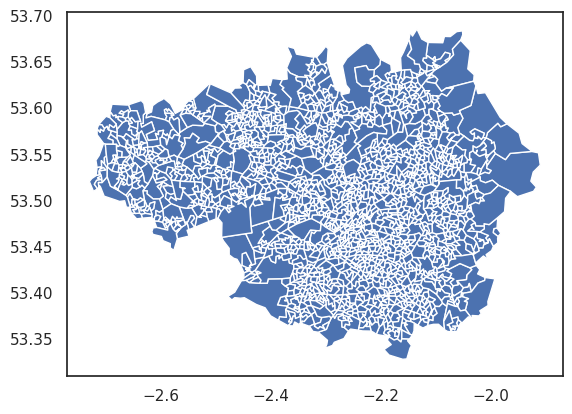

In [6]:
gm.plot()